In [1]:
import utils as ut
import receiverClass as rc
import senderClass as sc
import time
import matplotlib.pyplot as plt


In [2]:
bob = rc.receiver()
alice = sc.sender()

n_list = []
time_list = []

ciphers = open("ciphers_efficiency.txt", "w")

for i in range(31, 50):
    p, q = ut.generate_prime(1<<(i - 1), 1<<i)
    # p ,q = ut.generate_primes_bits(i)
    bob.p, bob.q = p, q

    # set value of e and n for both sender and receiver 
    bob.e = ut.generate_e(bob.p,bob.q)
    bob.n = bob.p * bob.q

    alice.e = bob.e
    alice.n = bob.n

    n_list.append(int(bob.n).bit_length())
    M = "nada"
    start = time.time_ns()
    cipher_text= alice.encrypt(M)  
    time_list.append(time.time_ns() - start)
    print(time.time_ns() - start)
    ciphers.write(str(ut.str2int(cipher_text)) + "\n")
    ciphers.write(str(bob.e) + "\n")
    ciphers.write(str(bob.n) + "\n")

ciphers.close() 


0
0
0
0
0
969000
0
1000300
0
0
17300
999300
997900
0
0
0
1009600
0
0


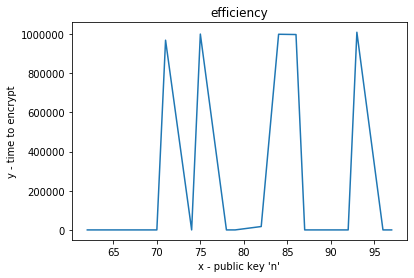

In [3]:
#ploting
plt.plot(n_list, time_list)

plt.xlabel('x - public key \'n\'')
plt.ylabel('y - time to encrypt')
plt.title('efficiency')
plt.xticks()

plt.show()

In [ ]:
# note that above graph is changing each run becouse of randomness 